In [ ]:
#Libraries that will be used
import pandas as pd
import numpy as np

### **Exploratory Data Analysis**

In [ ]:
men_data=pd.read_csv('men_results.csv')
print(men_data.info())
print(men_data['tournament'].value_counts())

women_data=pd.read_csv('women_results.csv')
print(women_data.info())
print(women_data['tournament'].value_counts())

### Filtering the data

In [ ]:
#Filtering tournament to Fifa World Cup
#men_wordcup_data=men_data[men_data['tournament']=='FIFA World Cup']
men_worldcup_data = men_data[men_data['tournament'].isin(['FIFA World Cup'])]
print(men_wordcup_data.head(5))

#men_wordcup_data=men_data[men_data['tournament']=='FIFA World Cup']
women_worldcup_data = women_data[women_data['tournament'].isin(['FIFA World Cup'])]
print(women_wordcup_data.head(5))

#Filtering tournament to date >'2002-01-01'
men_worldcup_data['date']=pd.to_datetime(men_wordcup_data['date'])
men_2002plus_data=men_worldcup_data[men_data['date'] >'2002-01-01']
print(men_2002plus_data.head(5))

women_worldcup_data['date']=pd.to_datetime(women_wordcup_data['date'])
women_2002plus_data=women_worldcup_data[women_data['date'] >'2002-01-01']
print(women_2002plus_data.head(5))

### Choosing the correct hypothesis test

In [ ]:
# Checking the sample sizes for both groups

sample_size_men = len(men_2002plus_data)
sample_size_women = len(women_2002plus_data)

print("Sample size for men:", sample_size_men)
print("Sample size for women:", sample_size_women)


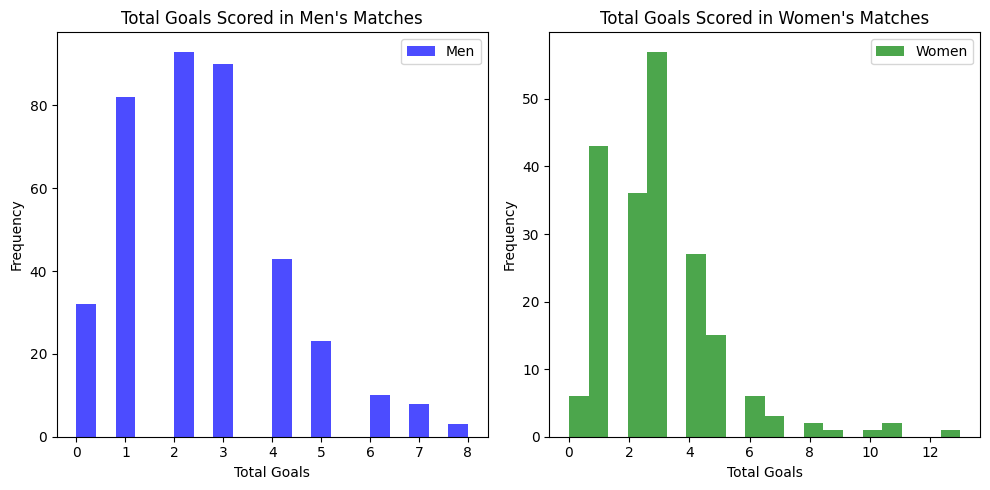

Shapiro-Wilk p-value for Combined Men's Scores: 8.894154401688226e-13
Shapiro-Wilk p-value for Combined Women's Scores: 3.8905201759850683e-13


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Assuming 'men_2002plus_data' and 'women_2002plus_data' are DataFrames with the specified columns

# Combine 'home_score' and 'away_score' for men and women
men_combined_scores = men_2002plus_data['home_score'] + men_2002plus_data['away_score']
women_combined_scores = women_2002plus_data['home_score'] + women_2002plus_data['away_score']

# Plot histograms for combined scores of men and women
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(men_combined_scores, bins=20, color='blue', alpha=0.7, label='Men')
plt.title("Total Goals Scored in Men's Matches")
plt.xlabel("Total Goals")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(women_combined_scores, bins=20, color='green', alpha=0.7, label='Women')
plt.title("Total Goals Scored in Women's Matches")
plt.xlabel("Total Goals")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality assumption on combined scores
stat_men, p_men = shapiro(men_combined_scores)
stat_women, p_women = shapiro(women_combined_scores)

print("Shapiro-Wilk p-value for Combined Men's Scores:", p_men)
print("Shapiro-Wilk p-value for Combined Women's Scores:", p_women)


In [113]:
import pandas as pd
import pingouin as pg

# Assuming 'men_2002plus_data' and 'women_2002plus_data' are DataFrames with the specified columns

# Summing 'home_score' and 'away_score' for men and women
men_total_scores = men_2002plus_data['home_score'] + men_2002plus_data['away_score']
women_total_scores = women_2002plus_data['home_score'] + women_2002plus_data['away_score']

# Perform Mann-Whitney U test (right-tailed)
result = pg.mwu(x=women_total_scores, y=men_total_scores, alternative='greater')  # x is women's scores

# Print test result
print(result)


       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [114]:
import pandas as pd
import pingouin as pg

# Assuming 'men_2002plus_data' and 'women_2002plus_data' are DataFrames with the specified columns

# Aggregate total scores for men and women
men_total_scores = men_2002plus_data['home_score'] + men_2002plus_data['away_score']
women_total_scores = women_2002plus_data['home_score'] + women_2002plus_data['away_score']

# Perform Mann-Whitney U test (right-tailed) using pingouin
result = pg.mwu(x=women_total_scores, y=men_total_scores, alternative='greater')  # x is women's scores

# Extract the p-value
p_value = result['p-val'].to_numpy()[0]  # Extracting the p-value from the result DataFrame

print("Mann-Whitney U test p-value:", p_value)


Mann-Whitney U test p-value: 0.005106609825443641


In [115]:
# Assuming you have obtained the p-value from the Mann-Whitney U test
p_val = 0.005106609825443641  # Replace this with the actual p-value you obtained

# Significance level
alpha = 0.01  # Set your desired significance level here (e.g., 0.01 for 1%)

# Evaluate against the significance level
if p_val <= alpha:
    result = "Reject"
else:
    result = "Fail to reject"

# Create a dictionary to store p-value and test result
result_dict = {"p_val": p_val, "result": result}

print(result_dict)


{'p_val': 0.005106609825443641, 'result': 'Reject'}
